In [1]:
import os
import sys
import pandas as pd
import numpy as np
import regex as re
import mygene
from matplotlib import pyplot as plt

In [2]:
mg = mygene.MyGeneInfo()

In [3]:
working_dir = "/Users/filippo/Developer/tesi"
os.chdir(working_dir)
dirs = os.listdir("data")

In [4]:
len(dirs)

8935

In [5]:
df = pd.read_csv(("%s/genes.txt"%working_dir), header=None)
df.columns=["gene"]
print(len(df['gene']))
df.head()

60483


,gene
0,ENSG00000242268.2
1,ENSG00000270112.3
2,ENSG00000167578.15
3,ENSG00000273842.1
4,ENSG00000078237.5


In [6]:
uniq = [g[:15] for g in df['gene'].values]

In [7]:
len(np.unique(uniq))

60483

In [9]:
df = pd.read_csv(("%s/mainTable.csv"%working_dir))
genes = np.array([gene[:15] for gene in df.loc[:,'gene'].values])
df['gene'] = genes

In [10]:
df.head()

,gene,85593c7d-7441-4d41-81d3-aaa17c7e398b.F,bfeaa9f7-e413-40b8-86ba-c9d26a96c240.F,426b94fe-fcff-49f2-9d0b-c7cb49bb5559.F,38083e21-7761-47c7-9112-769c7f85e283.F,6e2570b0-fc95-4ba9-a8a5-b79f6dea0246.F,21800024-cf76-4185-b57b-526539ccdba2.F,1f0f7598-d8c0-41ba-8b07-c958fecbb5f7.F,ea50d2da-4f84-46dc-8036-c34392793aed.F,7b2c7499-15c0-4926-a12c-4561df34954b.F,...,bd556315-a050-465f-9a41-bdebe7e3eb61.F,fde7c419-b8c0-4e04-8512-0e3b8eadebda.F,46551ef6-d1de-43c3-8ea5-5ade8a5bffd7.F,1a587b92-0a11-47f0-83c2-77a2b6de1088.F,171f664b-3226-4944-9219-91d2a7fdfb5f.F,9c77be54-d58e-4dec-8894-acb71a12cac5.F,2556ce90-db5f-4beb-897a-db3cf556e054.F,234724ab-6f82-4ac9-9948-37ffd9c3e418.F,cd550979-69b5-43d0-9724-cc25eb502cb8.F,03872f69-93f5-4d6c-aeb3-dadbc2762682.F
0,ENSG00000242268,0.076913,0.000000,0.137506,0.841950,0.522683,0.436242,0.062384,0.902013,0.000000,...,0.000000,0.046059,0.027827,0.000000,0.975612,0.000000,0.000000,0.000000,0.000000,0.000000
1,ENSG00000270112,0.007115,0.000000,0.010902,0.025961,0.616454,0.207531,0.025968,0.060075,1.020406,...,0.000000,0.019172,0.003861,0.031637,0.118014,0.000000,0.016449,0.000000,0.003548,0.000000
2,ENSG00000167578,6.736458,3.268259,0.804157,4.580433,3.330552,3.467188,1.923817,4.086256,2.477979,...,1.933432,4.589182,2.509192,1.182190,4.894803,3.463509,3.816159,2.281180,2.112157,11.051738
3,ENSG00000273842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000078237,4.449834,3.115587,1.536337,3.729699,3.989718,6.747617,3.787525,4.364158,4.201916,...,4.181816,15.874804,2.699238,6.278986,3.378318,6.234426,5.366732,2.985039,4.456480,3.583194


In [11]:
ngenes = len(df['gene'])
nfiles = len(df.loc[0,:])-1
print("genes:%d\trealizations:%d"%(ngenes,nfiles))

genes:60483	realizations:5000


### protein coding genes

In [11]:
protein_coding = pd.read_csv("genes_pc.txt", header=None)
protein_coding.values

array([['ENSG00000242268'],
       ['ENSG00000167578'],
       ['ENSG00000078237'],
       ...,
       ['ENSG00000231119'],
       ['ENSG00000123685'],
       ['ENSG00000181518']], dtype=object)

## query words

In [ ]:
cluster = [('3', 1.0), ('65', 1.0), ('89', 1.0), ('9', 1.0), ('34', 1.0)]

In [ ]:
for c,_ in cluster:
    print(df.keys()[int(c)][:-2])

## expression plot

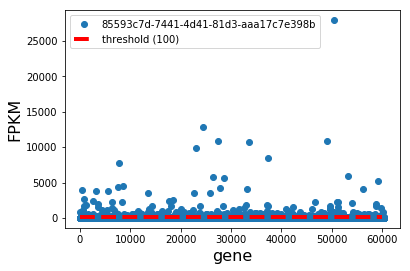

In [12]:
sample = 1
fig = plt.figure()
x = np.linspace(0, 60000)
key = df.keys()[sample]
plt.plot(df[key], 'o', label=key[:-2])
plt.plot(x, [100 for _ in x], 'r--', lw=4, label='threshold (100)')
plt.xlabel("gene", fontsize=16)
plt.ylabel("FPKM", fontsize=16)
plt.legend()
plt.show()

In [13]:
fig.savefig("singleFile.pdf")

## gene hist

In [223]:
def geneinfo(genename):
    #gene = 123
    #genename = df['gene'][gene]
    genedata = df.loc[df['gene']==genename].loc[:,df.keys()[1:]].values.reshape(nfiles,1)
    genemean = np.average(genedata)
    genesigma = np.std(genedata)
    genevariance = np.var(genedata)
    print("name: %s"%genename)
    try:
        q = mg.getgenes(genename[:15], 'name,symbol,refseq.rna,type_of_gene')[0]
        print("Descr: %s"%q['name'])
        print("Symbol: %s"%q['symbol'])
    except:
        pass
    print("FPKM mean: %10.2f"%genemean)
    print("FPKM sigma: %10.2f"%genesigma)
    print("FPKM var: %10.2f"%genevariance)
    genedict = {
        'name':genename,
        'avg' : genemean,
        'var': genevariance,
        'data' : genedata
    }
    return genedict

In [280]:
def genedistr(genedict, bins = 50):
    maxfpkm = np.max(genedict['data'])
    width = float(maxfpkm) / bins
    _range = (0 - 0.5 * width, maxfpkm + 0.5 * width)
    fig = plt.figure(figsize=(15, 5))
    plt.subplot(121)
    n, bin_edges, _ = plt.hist(genedict['data'], lw=1.5, density=False, histtype='step', range=_range, bins=bins)
    plt.title(genedict['name'], fontsize=16)
    plt.xlabel('FPKM', fontsize=16)
    plt.ylabel('#', fontsize=16)
    plt.subplot(122)
    n, bin_edges, _ = plt.hist(genedict['data'], lw=1.5, density=False, histtype='step', range=_range, bins=bins)
    plt.title(genedict['name'], fontsize=16)
    plt.xlabel('FPKM', fontsize=16)
    plt.ylabel('log(#)', fontsize=16)
    plt.yscale('log')
    plt.show()
    fig.savefig("plot/genes/%s_distr.pdf"%(genedict['name']))

In [310]:
def geneplot(genedict):
    fig = plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(genedict['data'], 'ob')
    plt.title(genedict['name'], fontsize=16)
    plt.xlabel("sample", fontsize=16)
    plt.ylabel("FPKM", fontsize=16)
    plt.subplot(122)
    plt.plot(genedict['data'], 'ob')
    plt.title(genedict['name'], fontsize=16)
    plt.xlabel("sample", fontsize=16)
    plt.ylabel("FPKM", fontsize=16)
    plt.yscale('log')
    plt.ylim(ymin=1e-4)
    plt.show()
    fig.savefig("plot/genes/%s_data.pdf"%(genedict['name']))

In [322]:
def genecoord(genedict):
    fig = plt.figure(figsize=(18,8))
    plt.subplot(121)
    plt.scatter(means, variances)
    plt.scatter([np.average(genedict['data'])],[np.var(genedict['data'])], marker='x', c='r', s=90, label=genedict['name'])
    plt.xlabel("$<FPKM>$", fontsize=16)
    plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
    #plt.xlim(1e-2,200)
    plt.ylim((1e-2,1e8))
    plt.legend()
    plt.subplot(122)
    plt.scatter(means, variances)
    plt.scatter([np.average(genedict['data'])],[np.var(genedict['data'])], marker='x', c='r', s=90, label=genedict['name'])
    plt.xlabel("$<FPKM>$", fontsize=16)
    plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
    plt.yscale('log')
    #plt.xlim(1e-3,200)
    plt.ylim(ymin=1e-2)
    plt.legend()
    plt.show()
    fig.savefig("plot/genes/%s_coord.png"%(genedict['name']))

## single gene

name: ENSG00000222500
querying 1-1...done.
Descr: RNA, 5S ribosomal pseudogene 475
Symbol: RNA5SP475
FPKM mean:       0.03
FPKM sigma:       1.11
FPKM var:       1.23


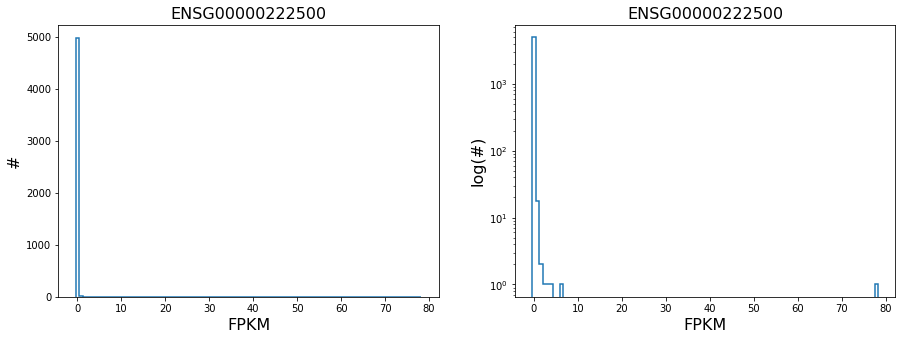

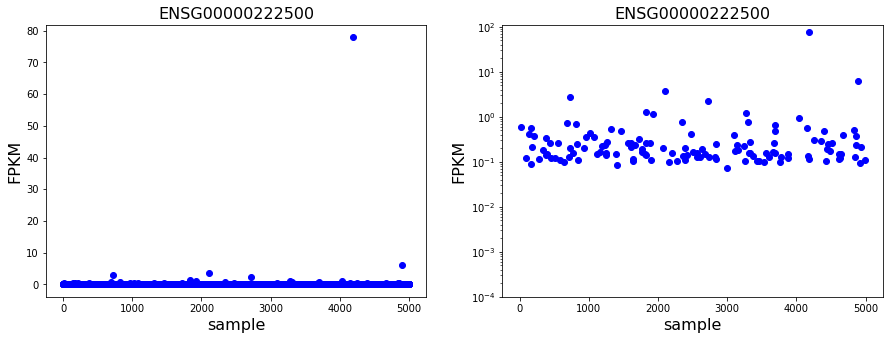

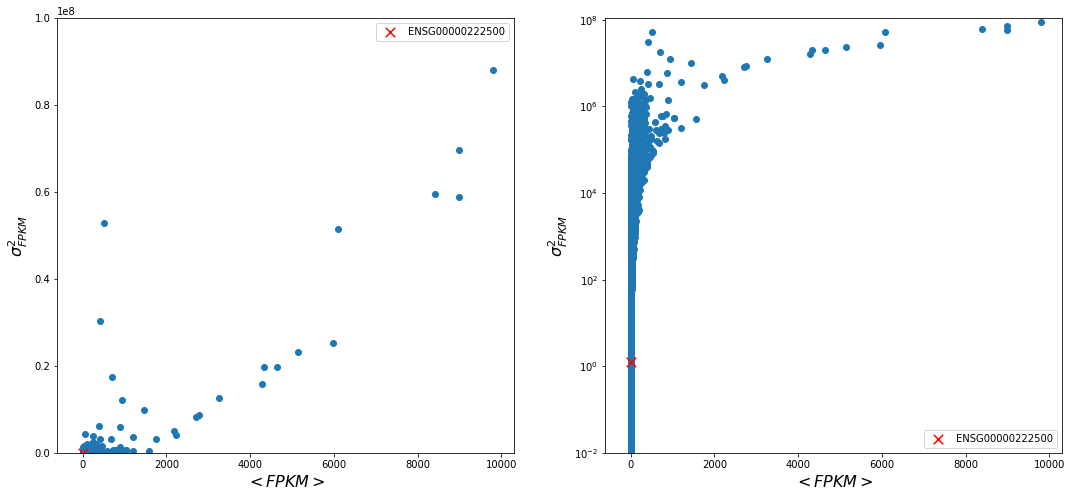

In [323]:
gene = geneinfo('ENSG00000222500')
genedistr(gene, 100);
geneplot(gene);
genecoord(gene);

## subset analysis

#### query genes

In [306]:
search_mean_max = 100
search_mean_min = 0
search_var_max = 1e0
search_var_min = 1e-5
query_result = df_mv.loc[((df_mv['mean']>(search_mean_min)) & (df_mv['mean']<(search_mean_max))) & ((df_mv['variance']>(search_var_min)) & (df_mv['variance']<(search_var_max)))].sort_values(by='mean')
query_result

,mean,variance
ENSG00000252173,0.000047,0.000011
ENSG00000238607,0.000048,0.000011
ENSG00000277197,0.000049,0.000012
ENSG00000227439,0.000052,0.000013
ENSG00000276311,0.000052,0.000013
ENSG00000221785,0.000053,0.000014
ENSG00000252535,0.000054,0.000015
ENSG00000275391,0.000054,0.000015
ENSG00000252471,0.000064,0.000021
ENSG00000255472,0.000066,0.000011


In [307]:
genesnames = []
for g in query_result.index.values[:10]:
    gene = geneinfo(g)
    genesnames.append(gene)

name: ENSG00000252173
querying 1-1...done.
Descr: RNA, U6 small nuclear 109, pseudogene
Symbol: RNU6-109P
FPKM mean:       0.00
FPKM sigma:       0.00
FPKM var:       0.00
name: ENSG00000238607
querying 1-1...done.
FPKM mean:       0.00
FPKM sigma:       0.00
FPKM var:       0.00
name: ENSG00000277197
querying 1-1...done.
FPKM mean:       0.00
FPKM sigma:       0.00
FPKM var:       0.00
name: ENSG00000227439
querying 1-1...done.
Descr: testis-specific transcript, Y-linked 17B
Symbol: TTTY17B
FPKM mean:       0.00
FPKM sigma:       0.00
FPKM var:       0.00
name: ENSG00000276311
querying 1-1...done.
Descr: microRNA 6511a-3
Symbol: MIR6511A3
FPKM mean:       0.00
FPKM sigma:       0.00
FPKM var:       0.00
name: ENSG00000221785
querying 1-1...done.
FPKM mean:       0.00
FPKM sigma:       0.00
FPKM var:       0.00
name: ENSG00000252535
querying 1-1...done.
Descr: RNA, 5S ribosomal pseudogene 254
Symbol: RNA5SP254
FPKM mean:       0.00
FPKM sigma:       0.00
FPKM var:       0.00
name: ENSG

### plot coordinates

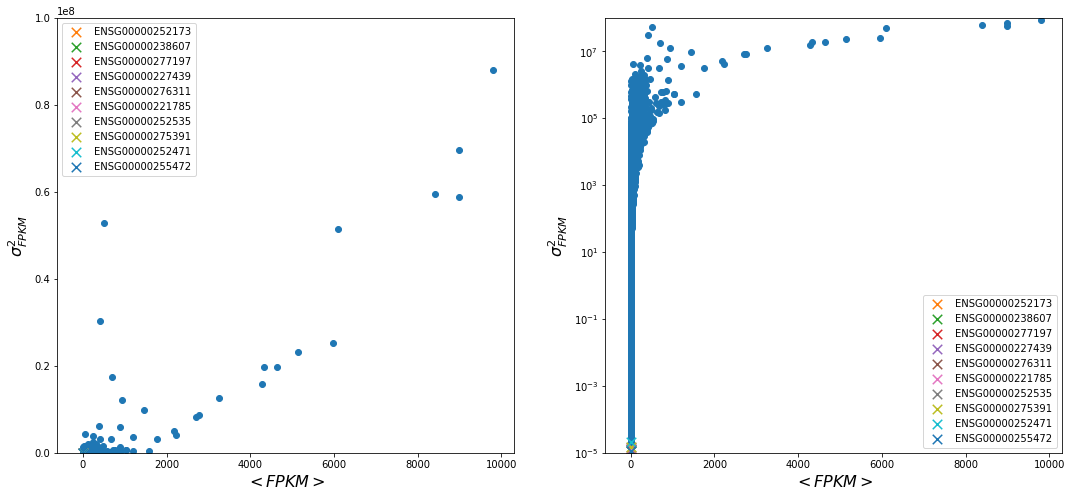

In [311]:
fig = plt.figure(figsize=(18,8))
plt.subplot(121)
plt.scatter(means, variances)
for g in genesnames:
    plt.scatter([g['avg']],[g['var']], marker='x', s=90, label=g['name'])
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
#plt.xlim(1e-2,200)
plt.ylim((1e-2,1e8))
plt.legend()
plt.subplot(122)
plt.scatter(means, variances)
for g in genesnames:
    plt.scatter([g['avg']],[g['var']], marker='x', s=90, label=g['name'])
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.yscale('log')
#plt.xlim(1e-2,200)
plt.ylim((1e-5,1e8))
plt.legend()
plt.show()
fig.savefig("plot/genes/subset.pdf")

### plot all

name: ENSG00000252173
querying 1-1...done.
Descr: RNA, U6 small nuclear 109, pseudogene
Symbol: RNU6-109P
FPKM mean:       0.00
FPKM sigma:       0.00
FPKM var:       0.00


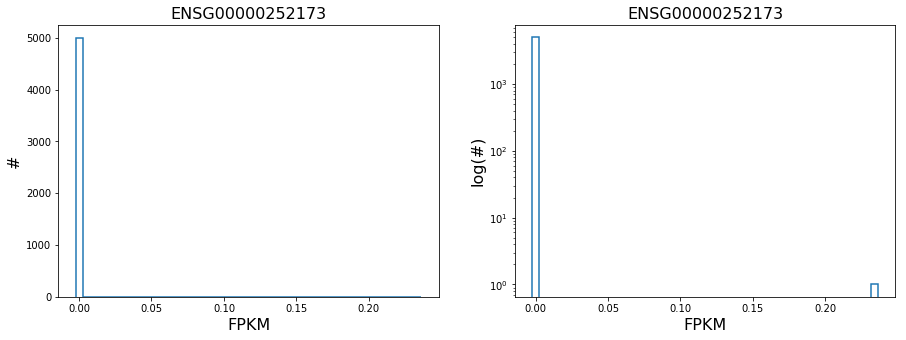

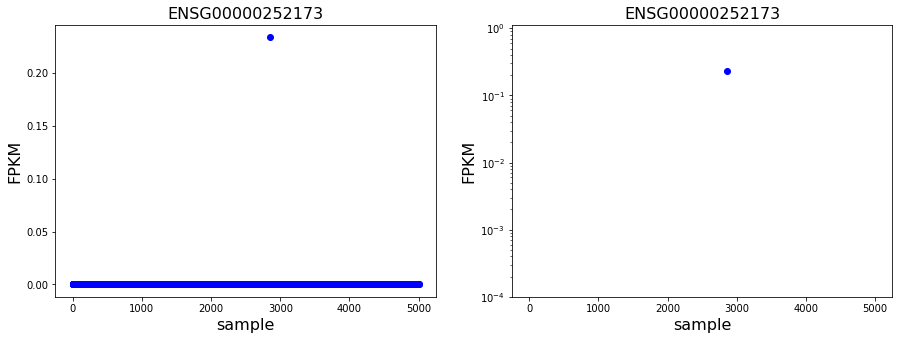

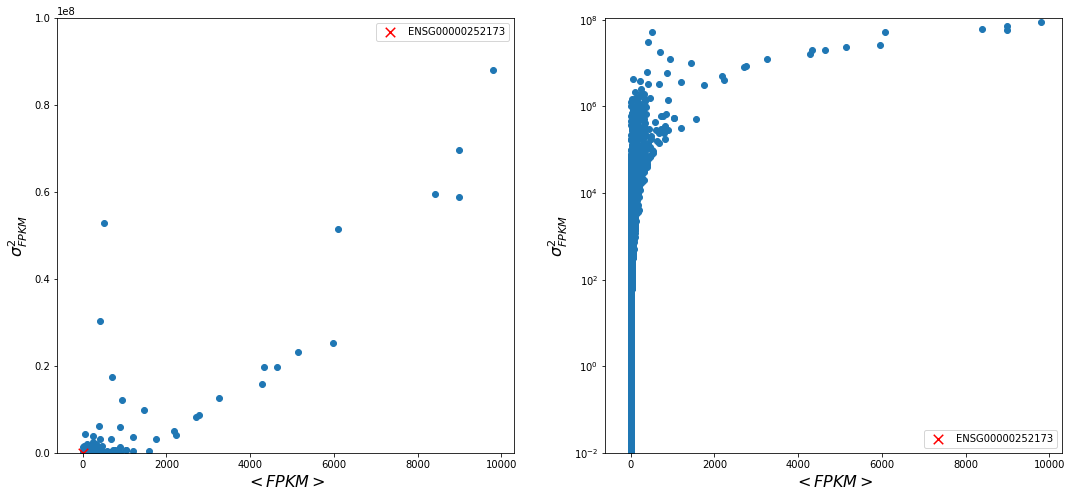

name: ENSG00000238607
querying 1-1...done.
FPKM mean:       0.00
FPKM sigma:       0.00
FPKM var:       0.00


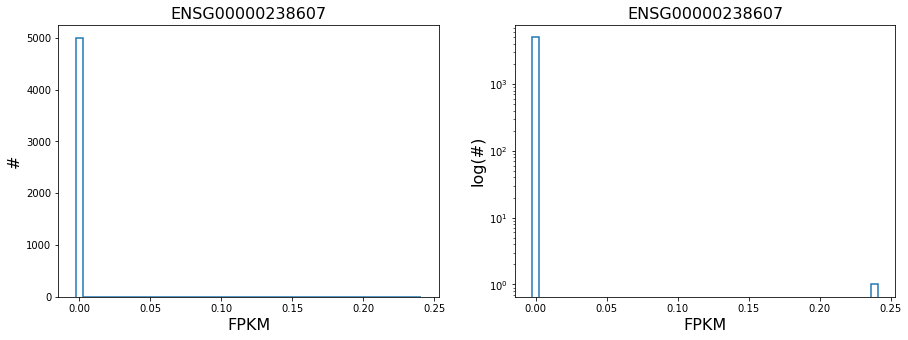

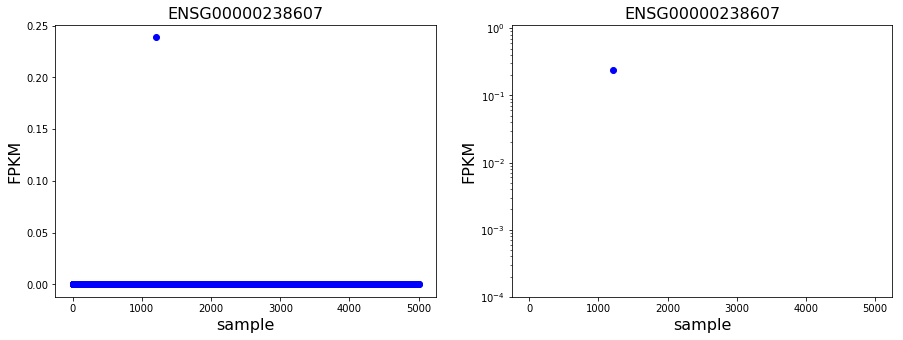

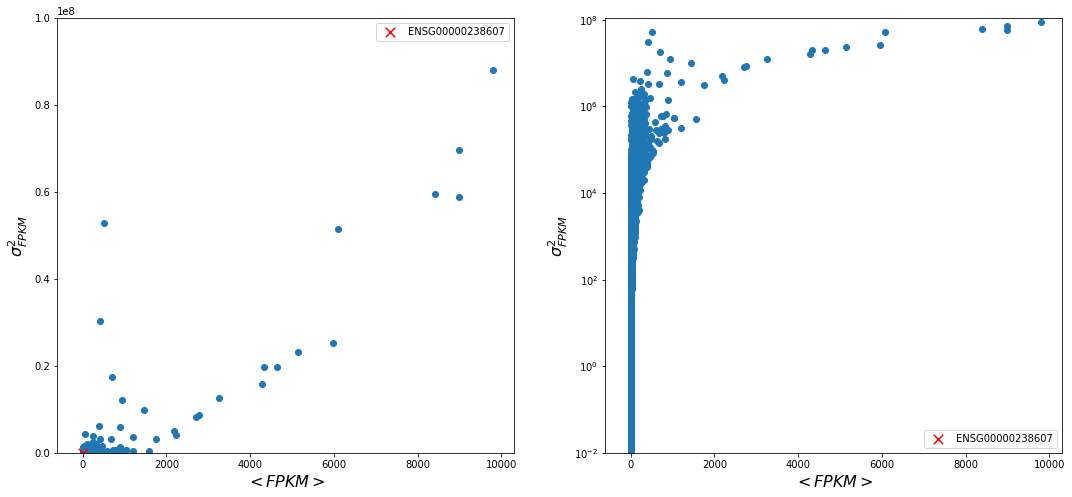

name: ENSG00000277197
querying 1-1...done.
FPKM mean:       0.00
FPKM sigma:       0.00
FPKM var:       0.00


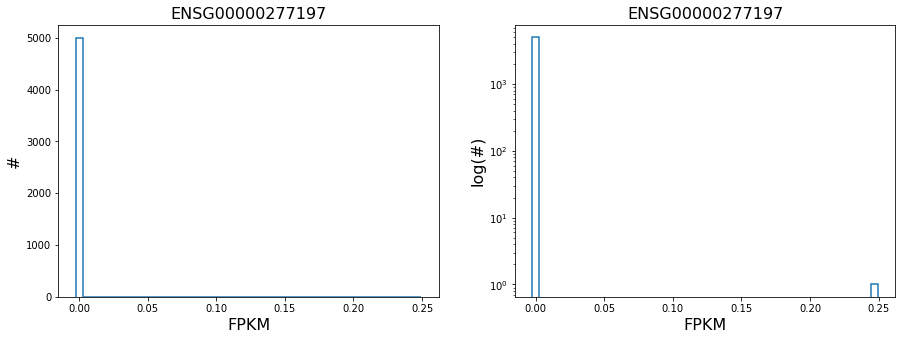

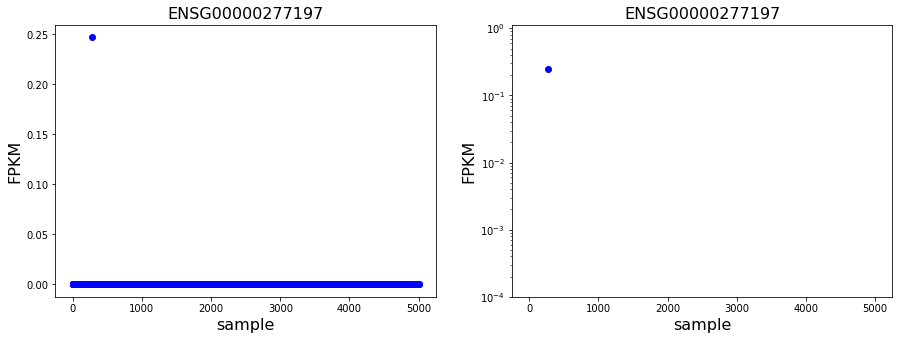

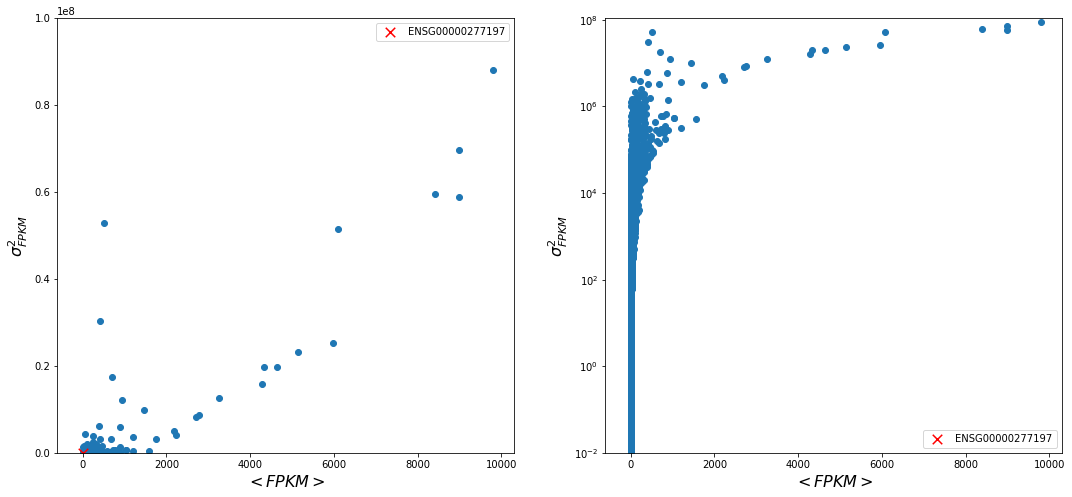

name: ENSG00000227439
querying 1-1...done.
Descr: testis-specific transcript, Y-linked 17B
Symbol: TTTY17B
FPKM mean:       0.00
FPKM sigma:       0.00
FPKM var:       0.00


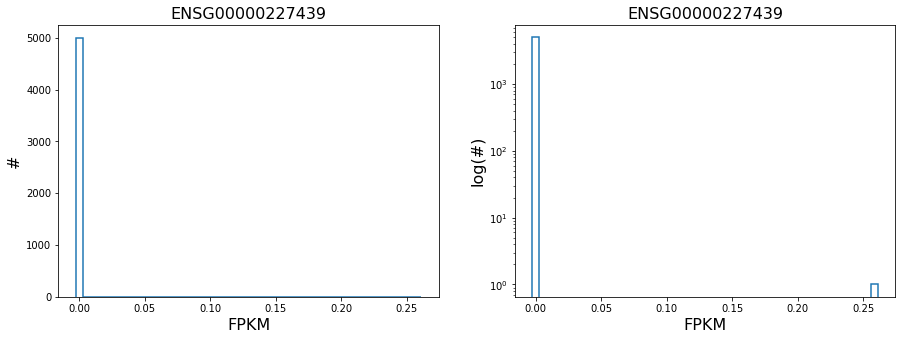

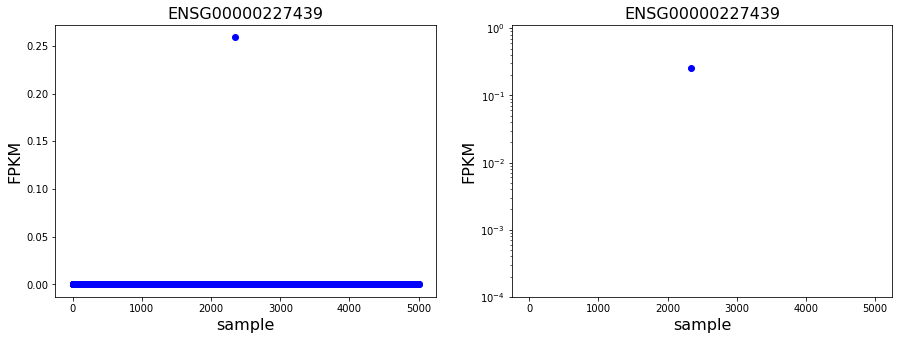

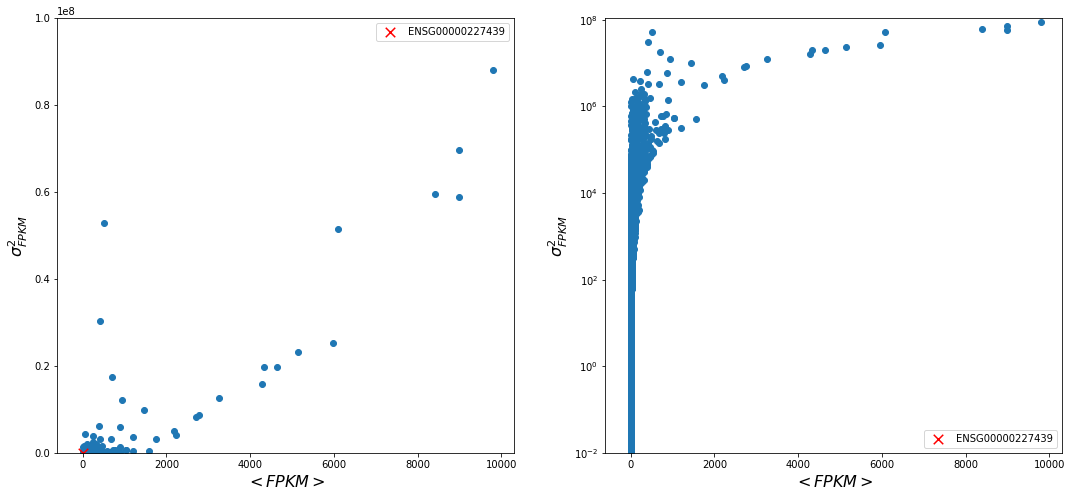

name: ENSG00000276311
querying 1-1...done.
Descr: microRNA 6511a-3
Symbol: MIR6511A3
FPKM mean:       0.00
FPKM sigma:       0.00
FPKM var:       0.00


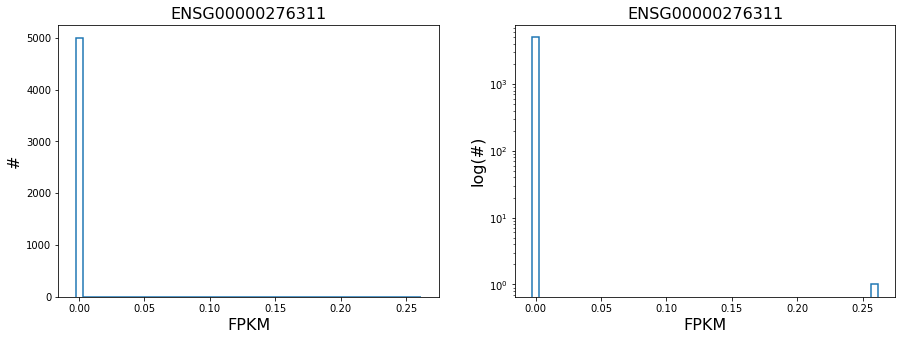

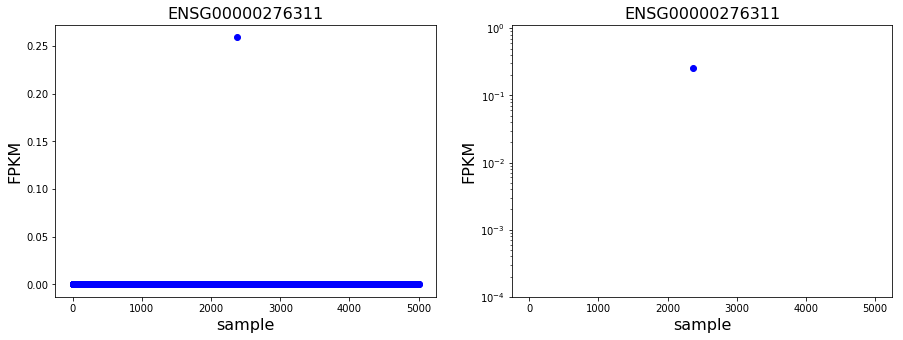

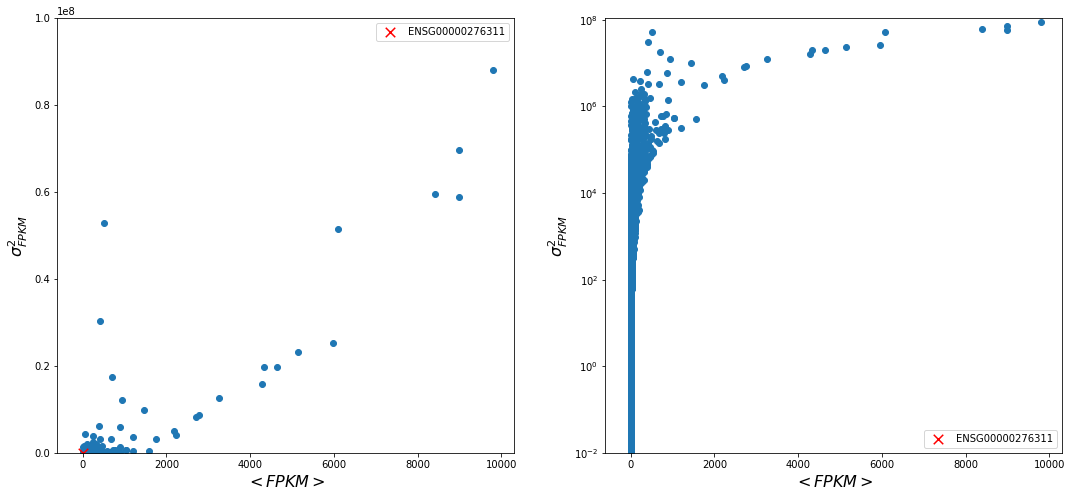

name: ENSG00000221785
querying 1-1...done.
FPKM mean:       0.00
FPKM sigma:       0.00
FPKM var:       0.00


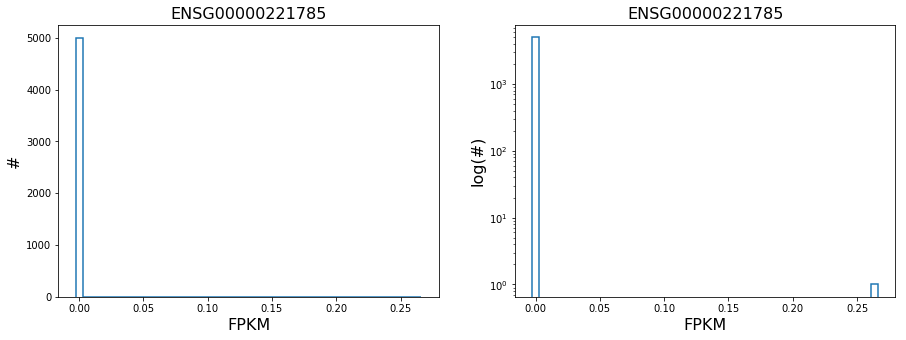

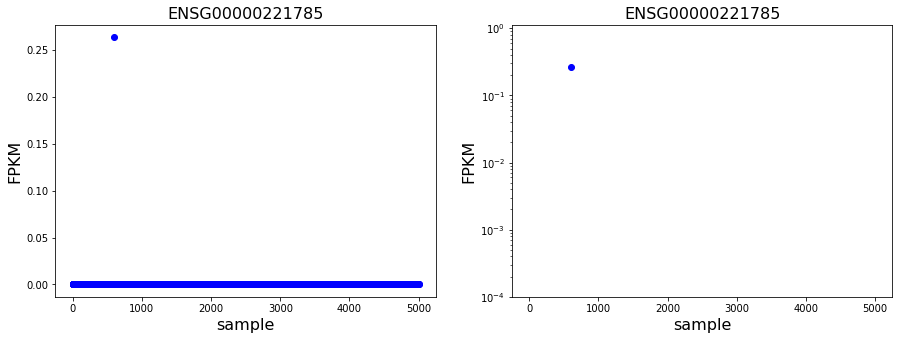

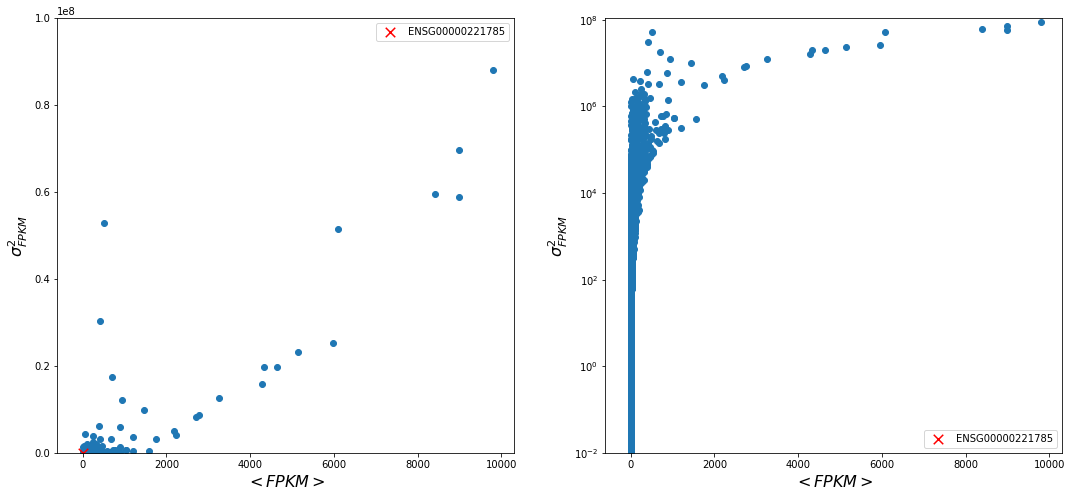

name: ENSG00000252535
querying 1-1...done.
Descr: RNA, 5S ribosomal pseudogene 254
Symbol: RNA5SP254
FPKM mean:       0.00
FPKM sigma:       0.00
FPKM var:       0.00


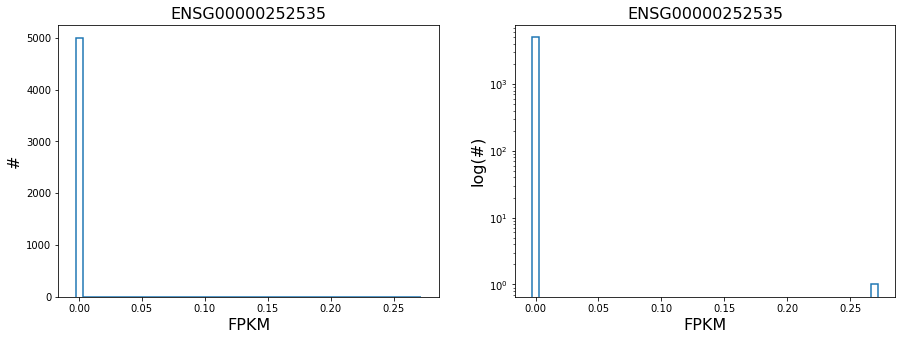

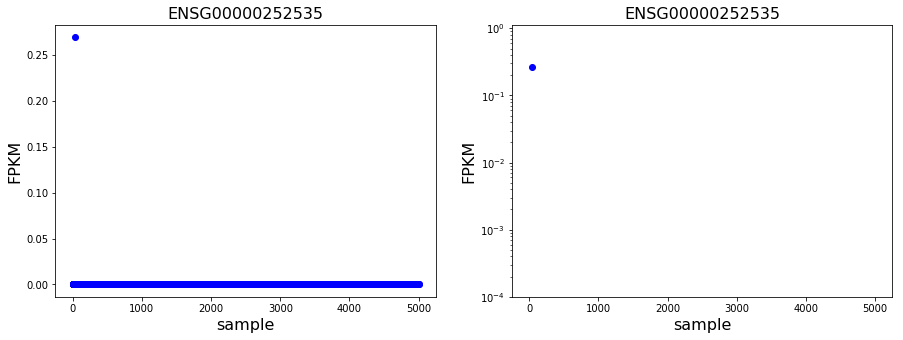

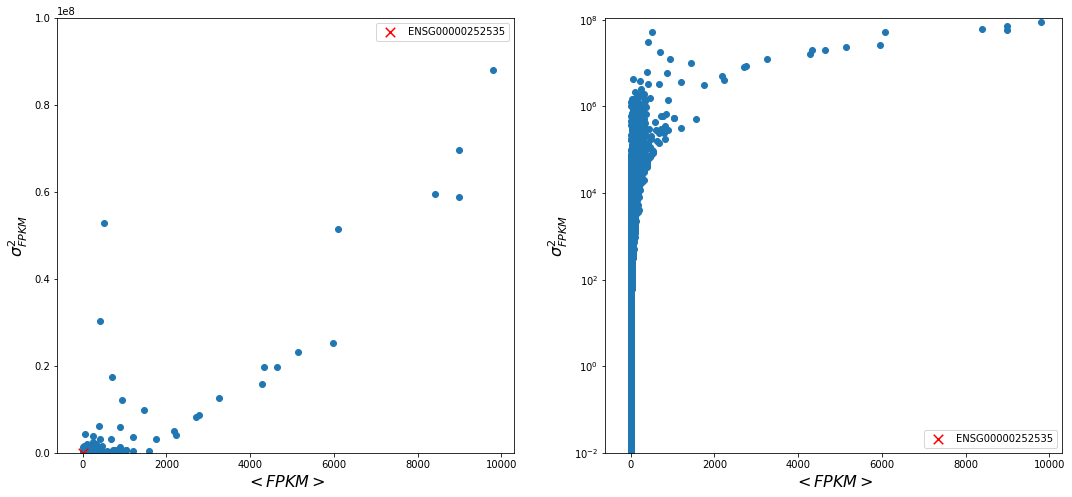

name: ENSG00000275391
querying 1-1...done.
Descr: microRNA 6770-3
Symbol: MIR6770-3
FPKM mean:       0.00
FPKM sigma:       0.00
FPKM var:       0.00


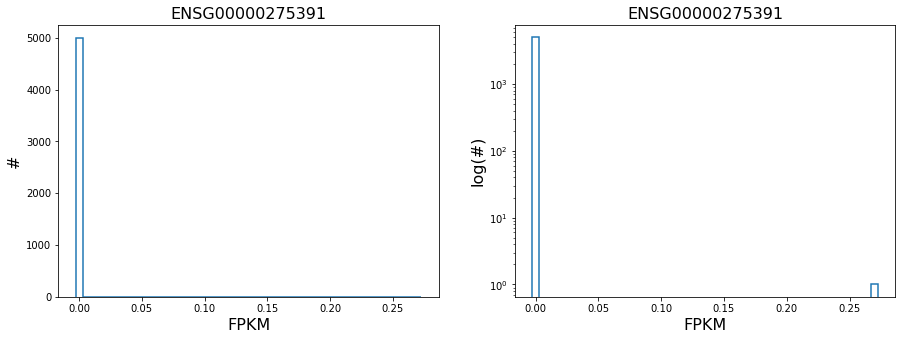

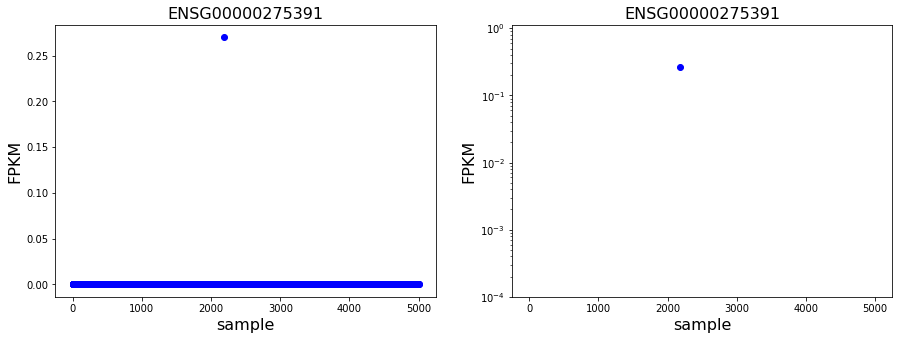

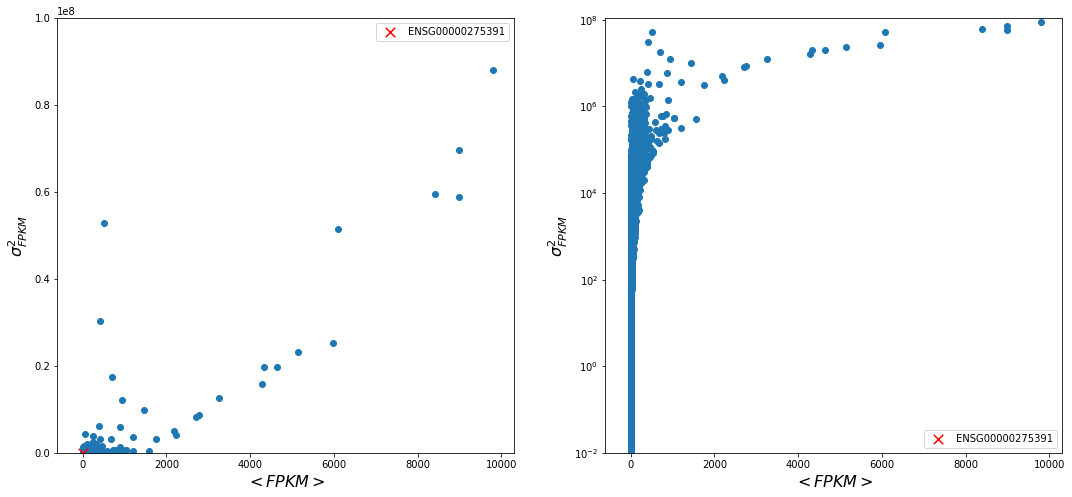

name: ENSG00000252471
querying 1-1...done.
FPKM mean:       0.00
FPKM sigma:       0.00
FPKM var:       0.00


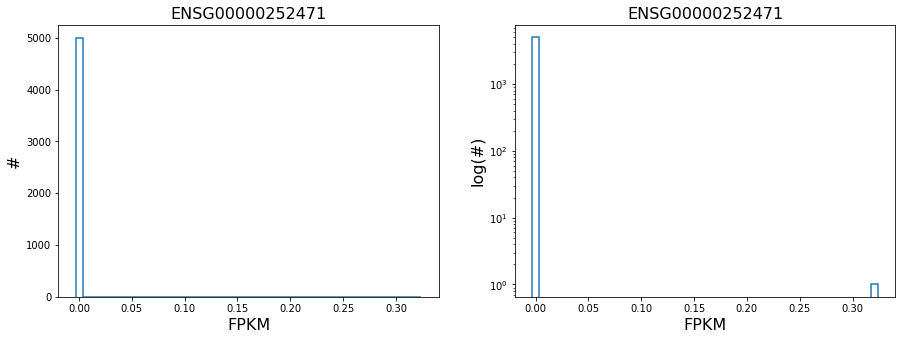

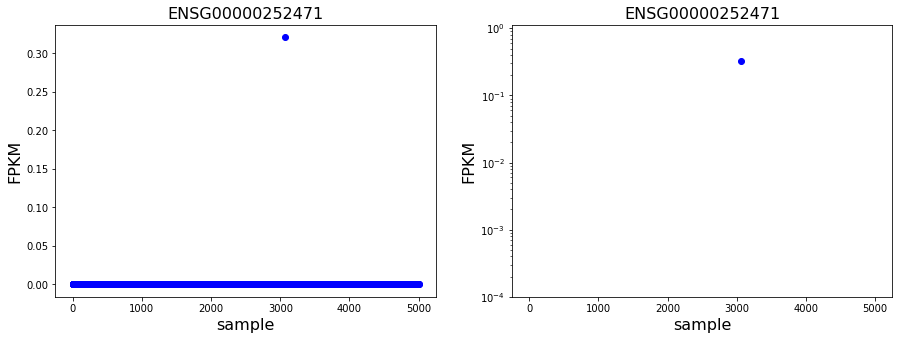

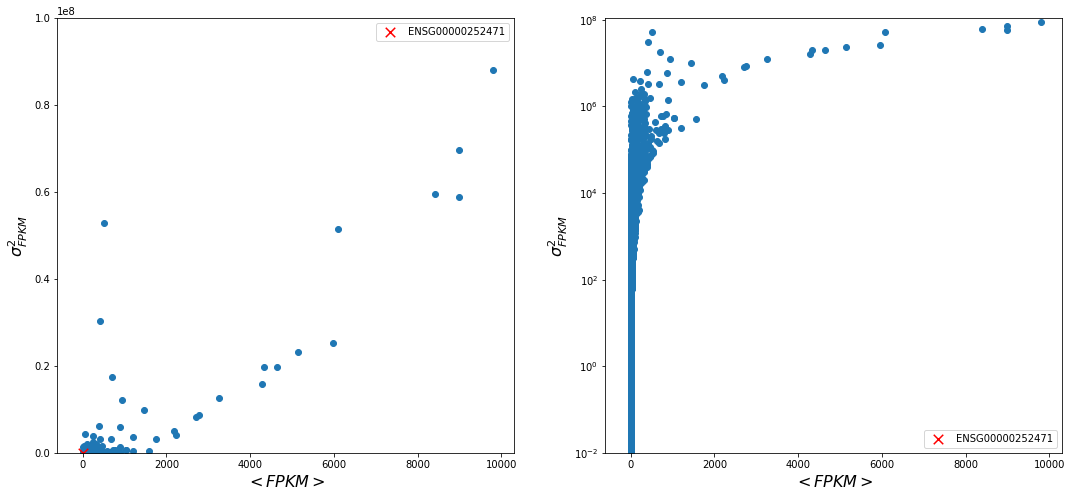

name: ENSG00000255472
querying 1-1...done.
FPKM mean:       0.00
FPKM sigma:       0.00
FPKM var:       0.00


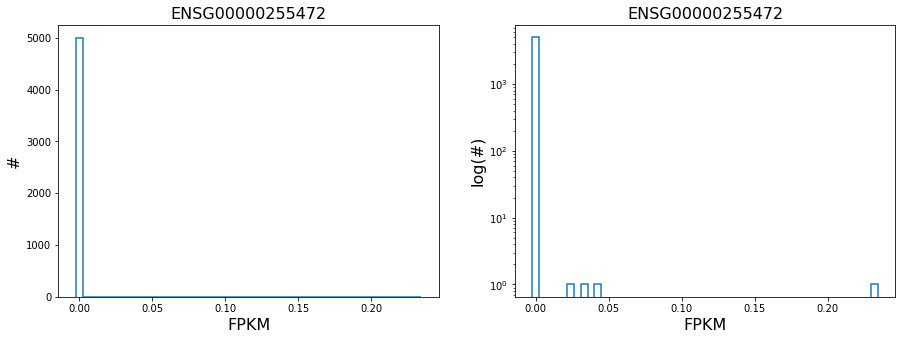

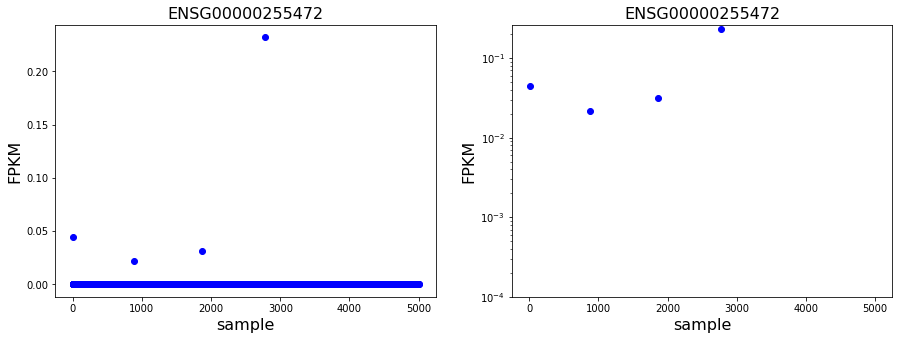

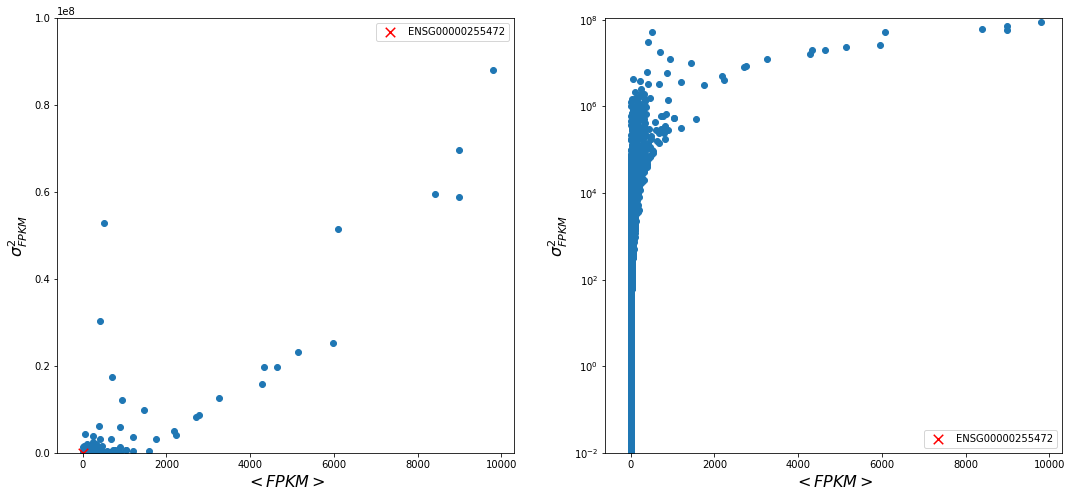

In [324]:
for g in query_result.index.values[:10]:
    gene = geneinfo(g)
    genedistr(gene);
    geneplot(gene);
    genecoord(gene);

## Means sigmas

### generate

In [14]:
means = []
for i,g in enumerate(df.loc[:,df.keys()[0]].values):
    means.append(np.average(df.loc[i,df.keys()[1:]].values))
    if(i%100==0):
        print("elapsed %d"%i)

elapsed 0
elapsed 100
elapsed 200
elapsed 300
elapsed 400
elapsed 500
elapsed 600
elapsed 700
elapsed 800
elapsed 900
elapsed 1000
elapsed 1100
elapsed 1200
elapsed 1300
elapsed 1400
elapsed 1500
elapsed 1600
elapsed 1700
elapsed 1800
elapsed 1900
elapsed 2000
elapsed 2100
elapsed 2200
elapsed 2300
elapsed 2400
elapsed 2500
elapsed 2600
elapsed 2700
elapsed 2800
elapsed 2900
elapsed 3000
elapsed 3100
elapsed 3200
elapsed 3300
elapsed 3400
elapsed 3500
elapsed 3600
elapsed 3700
elapsed 3800
elapsed 3900
elapsed 4000
elapsed 4100
elapsed 4200
elapsed 4300
elapsed 4400
elapsed 4500
elapsed 4600
elapsed 4700
elapsed 4800
elapsed 4900
elapsed 5000
elapsed 5100
elapsed 5200
elapsed 5300
elapsed 5400
elapsed 5500
elapsed 5600
elapsed 5700
elapsed 5800
elapsed 5900
elapsed 6000
elapsed 6100
elapsed 6200
elapsed 6300
elapsed 6400
elapsed 6500
elapsed 6600
elapsed 6700
elapsed 6800
elapsed 6900
elapsed 7000
elapsed 7100
elapsed 7200
elapsed 7300
elapsed 7400
elapsed 7500
elapsed 7600
elapsed 770

elapsed 59400
elapsed 59500
elapsed 59600
elapsed 59700
elapsed 59800
elapsed 59900
elapsed 60000
elapsed 60100
elapsed 60200
elapsed 60300
elapsed 60400


In [15]:
%timeit
variances = []
for i,g in enumerate(df.loc[:,df.keys()[0]].values):
    variances.append(np.var(df.loc[i,df.keys()[1:]].values))
    if(i%100==0):
        print("elapsed %d"%i)

elapsed 0
elapsed 100
elapsed 200
elapsed 300
elapsed 400
elapsed 500
elapsed 600
elapsed 700
elapsed 800
elapsed 900
elapsed 1000
elapsed 1100
elapsed 1200
elapsed 1300
elapsed 1400
elapsed 1500
elapsed 1600
elapsed 1700
elapsed 1800
elapsed 1900
elapsed 2000
elapsed 2100
elapsed 2200
elapsed 2300
elapsed 2400
elapsed 2500
elapsed 2600
elapsed 2700
elapsed 2800
elapsed 2900
elapsed 3000
elapsed 3100
elapsed 3200
elapsed 3300
elapsed 3400
elapsed 3500
elapsed 3600
elapsed 3700
elapsed 3800
elapsed 3900
elapsed 4000
elapsed 4100
elapsed 4200
elapsed 4300
elapsed 4400
elapsed 4500
elapsed 4600
elapsed 4700
elapsed 4800
elapsed 4900
elapsed 5000
elapsed 5100
elapsed 5200
elapsed 5300
elapsed 5400
elapsed 5500
elapsed 5600
elapsed 5700
elapsed 5800
elapsed 5900
elapsed 6000
elapsed 6100
elapsed 6200
elapsed 6300
elapsed 6400
elapsed 6500
elapsed 6600
elapsed 6700
elapsed 6800
elapsed 6900
elapsed 7000
elapsed 7100
elapsed 7200
elapsed 7300
elapsed 7400
elapsed 7500
elapsed 7600
elapsed 770

elapsed 59400
elapsed 59500
elapsed 59600
elapsed 59700
elapsed 59800
elapsed 59900
elapsed 60000
elapsed 60100
elapsed 60200
elapsed 60300
elapsed 60400


In [16]:
df_mv = pd.DataFrame(data=np.array(means), columns=['mean'], index=df.loc[:,df.keys()[0]].values)

In [17]:
df_mv.insert(1, 'variance', np.array(variances))

In [18]:
df_mv.head()

,mean,variance
ENSG00000242268,0.165158,0.292284
ENSG00000270112,0.028165,0.016174
ENSG00000167578,3.861123,6.342788
ENSG00000273842,0.006980,0.006047
ENSG00000078237,4.457380,17.953745


In [19]:
df_mv.to_csv("meanVariances.csv")

### read

In [ ]:
df_mv = pd.read_csv("meanVariances.csv", index_col = [0])
df_mv.head()

In [103]:
means = df_mv['mean'].values
variances = df_mv['variance'].values
len(means)

60483

## plot

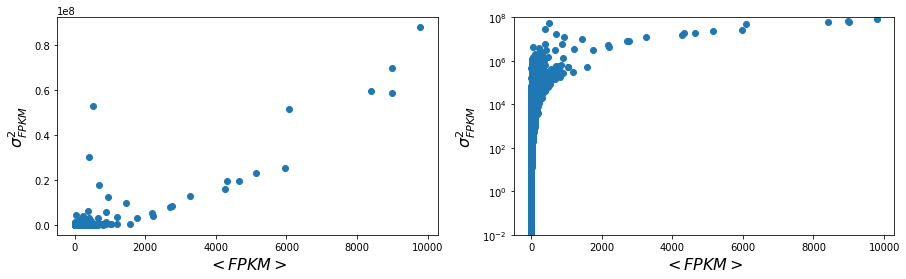

In [20]:
fig=plt.figure(figsize=(15,4))
plt.subplot(121)
plt.scatter(means, variances)
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.subplot(122)
plt.scatter(means, variances)
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.yscale('log')
#plt.xlim(1e-2,200)
plt.ylim((1e-2,1e8))
plt.show()

In [21]:
fig.savefig("varmean.pdf")

In [22]:
len(means)

60483

In [23]:
len(variances)

60483

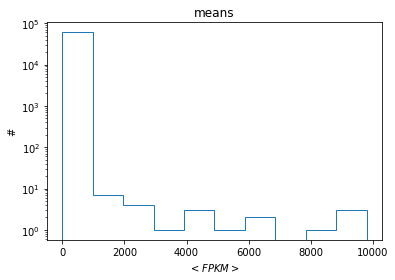

In [28]:
fig = plt.figure()
n, c, _ = plt.hist(means, density = False, histtype='step')
plt.title("means")
plt.xlabel("$<FPKM>$")
plt.ylabel("#")
plt.yscale('log')
plt.show()
fig.savefig("mean_distr.pdf")

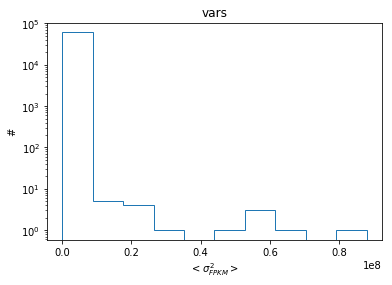

In [30]:
fig = plt.figure()
n, c, _ = plt.hist(variances, density = False, histtype='step')
plt.title("vars")
plt.xlabel("$<\sigma_{FPKM}^2>$")
plt.ylabel("#")
plt.yscale('log')
plt.show()
fig.savefig("var_distr.pdf")

# null

In [74]:
df_null = pd.read_csv(("%s/nullTable.csv"%working_dir))

In [82]:
df_null.head()

,Unnamed: 0,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49
0,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#gene = 456
genename = 'ENSG00000078237'
#genename = df['gene'][gene]
generow = df_null.loc[df_null['gene']==genename].loc[:,df_null.keys()[1:]].values.reshape(nfiles,1)
maxfpkm = np.max(generow)
bins = 15
width = maxfpkm / bins
_range = (0 - 0.5 * width, maxfpkm + 0.5 * width)
genedata = df_null.loc[df_null['gene']==genename].loc[:,df_null.keys()[1:]].values.reshape(nfiles,1)
print("name: %s"%genename)
try:
    q = mg.getgenes(genename[:15], 'name,symbol,refseq.rna,type_of_gene')[0]
    print("Descr: %s"%q['name'])
    print("Symbol: %s"%q['symbol'])
except:
    pass
print("FPKM mean: %10.2f"%np.average(genedata))
print("FPKM sigma: %10.2f"%np.std(genedata))
print("FPKM var: %10.2f"%np.var(genedata))

In [75]:
means_null = [np.average(df_null.loc[i,df_null.keys()[1:]].values) for i,g in enumerate(df_null.loc[:,df_null.keys()[0]].values)]
variances_null = [np.var(df_null.loc[i,df_null.keys()[1:]].values) for i,g in enumerate(df_null.loc[:,df_null.keys()[0]].values)]

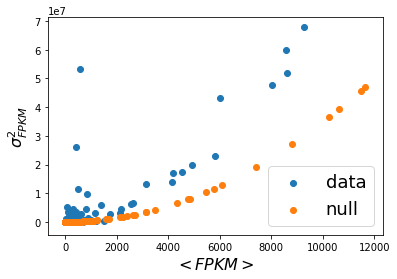

In [77]:
fig=plt.figure()
plt.scatter(means, variances, label='data')
plt.scatter(means_null, sigmas_null, label='null')
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.legend(fontsize=18)
plt.show()

In [ ]:
fig.savefig("varmean_null.pdf")

## data size Heaps check

In [175]:
col = df.loc[:,df.keys()[1]].values
np.sum(col)

507237.8235909127

In [177]:
len(col[col.nonzero()])

34024

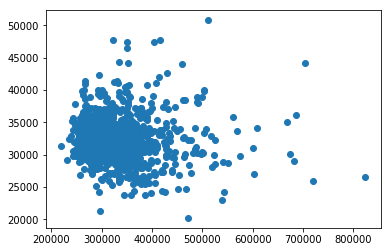

In [182]:
x = []
y = []
for i in range(1, 1000):
    col = df.loc[:,df.keys()[i]].values
    x.append(np.sum(col))
    y.append(len(col[col.nonzero()]))
plt.scatter(x,y)